***HELLO THIS IS RAMAVTAR***

 I am working with the Startup Funding dataset and perform Exploratory Data Analysis (EDA) in two steps:
 
1.	Univariate Analysis (single variable insights)
	-	Summary statistics (mean, median, mode)
	-	Histograms, boxplots, and bar charts
    
2.	Multivariate Analysis (relationships between variables)
	-	Correlation matrix, scatter plots, heatmaps


we’re working with:
	-	Total Rows: 3,044
	-	Columns: 10
	
**Issues:**
-	Amount in USD is stored as text (needs conversion to numeric).
-	Industry Vertical, City Location, and SubVertical have missing values.
-	Date dd/mm/yyyy needs to be converted to a proper date format.
-	Remarks column has very few entries—might not be useful.

##### EDA Plan

1. Univariate Analysis (Analyzing single variables)

	-	Top-funded startups & industries
	-	Distribution of funding amounts
	-	Most active investors
	-	Funding trends over time

2. Multivariate Analysis (Relationships between variables)

	-	Which industry gets the highest funding?
	-	Which cities attract the most funding?
	-	Investment types vs. funding amount

## Loading and Cleaning the Dataset

In [112]:
# importing libraries that use here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Load dataset
df = pd.read_csv("startup_funding.csv")  

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [114]:
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [115]:
df.head(10)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [116]:
# Make a copy to avoid modifying the original dataset
df_clean = df.copy()

In [117]:

# Rename columns for easier access
df_clean.rename(columns={
    "Date dd/mm/yyyy": "Date",
    "City  Location": "City",
    "InvestmentnType": "Investment Type"
}, inplace=True)

# Convert 'Date' to proper datetime format
df_clean["Date"] = pd.to_datetime(df_clean["Date"], format="%d/%m/%Y", errors="coerce")

df_clean["Amount in USD"] = pd.to_numeric(df_clean["Amount in USD"].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")

# Drop unnecessary columns
df_clean.drop(columns=["Sr No", "Remarks"], inplace=True)

# Check the cleaned dataset
df_clean.info()
df_clean.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3036 non-null   datetime64[ns]
 1   Startup Name       3044 non-null   object        
 2   Industry Vertical  2873 non-null   object        
 3   SubVertical        2108 non-null   object        
 4   City               2864 non-null   object        
 5   Investors Name     3020 non-null   object        
 6   Investment Type    3040 non-null   object        
 7   Amount in USD      2077 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 190.4+ KB


,Date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
5,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0
6,2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0
7,2019-12-12,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6000000.0
8,2019-12-06,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,70000000.0
9,2019-12-03,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,50000000.0


## Univariate Analysis (Single Variable Insights)

#### 1. Distribution of Funding Amounts

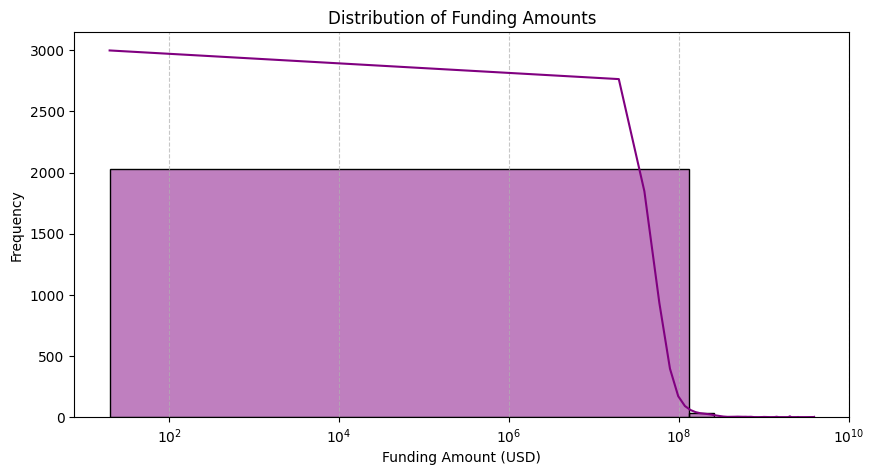

In [118]:
plt.figure(figsize=(10,5))
#Here i use Kernel Density Estimation (KDE) curve, which is a smooth version of the histogram.
sns.histplot(df_clean["Amount in USD"].dropna(), bins=30, kde=True, color="purple")

# Set log scale for better visualization
plt.xscale("log")  

plt.xlabel("Funding Amount (USD)")
plt.ylabel("Frequency") #how many times each funding amount range appears.
plt.title("Distribution of Funding Amounts")

plt.grid(axis="x", linestyle="--", alpha=0.7)  # Adding grid for better readability
plt.show()

### 2.  Top 10 Most Funded Startups

In [119]:
top_funded_startups = df_clean.groupby("Startup Name")["Amount in USD"].sum().sort_values(ascending=False).head(10)
top_funded_startups


Startup Name
Flipkart                    4.059700e+09
Rapido Bike Taxi            3.900000e+09
Paytm                       3.148950e+09
\\xc2\\xa0News in shorts    2.020000e+09
\\xc2\\xa0Loylty Rewards    2.019350e+09
\\xc2\\xa0Bluestone         2.016200e+09
\\xc2\\xa0Mamagoto          2.010000e+09
Ola                         9.845000e+08
Udaan                       8.700000e+08
Flipkart.com                7.000000e+08
Name: Amount in USD, dtype: float64

Since the data is still not clean so we have to clean it further

In [120]:
df["Startup Name"] = df["Startup Name"].str.replace(r"\\xc2\\xa0", " ", regex=True)

In [121]:
top_funded_startups

Startup Name
Flipkart                    4.059700e+09
Rapido Bike Taxi            3.900000e+09
Paytm                       3.148950e+09
\\xc2\\xa0News in shorts    2.020000e+09
\\xc2\\xa0Loylty Rewards    2.019350e+09
\\xc2\\xa0Bluestone         2.016200e+09
\\xc2\\xa0Mamagoto          2.010000e+09
Ola                         9.845000e+08
Udaan                       8.700000e+08
Flipkart.com                7.000000e+08
Name: Amount in USD, dtype: float64

/var/folders/m2/8_jd9vkj7g7_cy51bwwn9jxh0000gn/T/ipykernel_40672/2836257331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_funded_startups.values, y=top_funded_startups.index, palette="coolwarm")


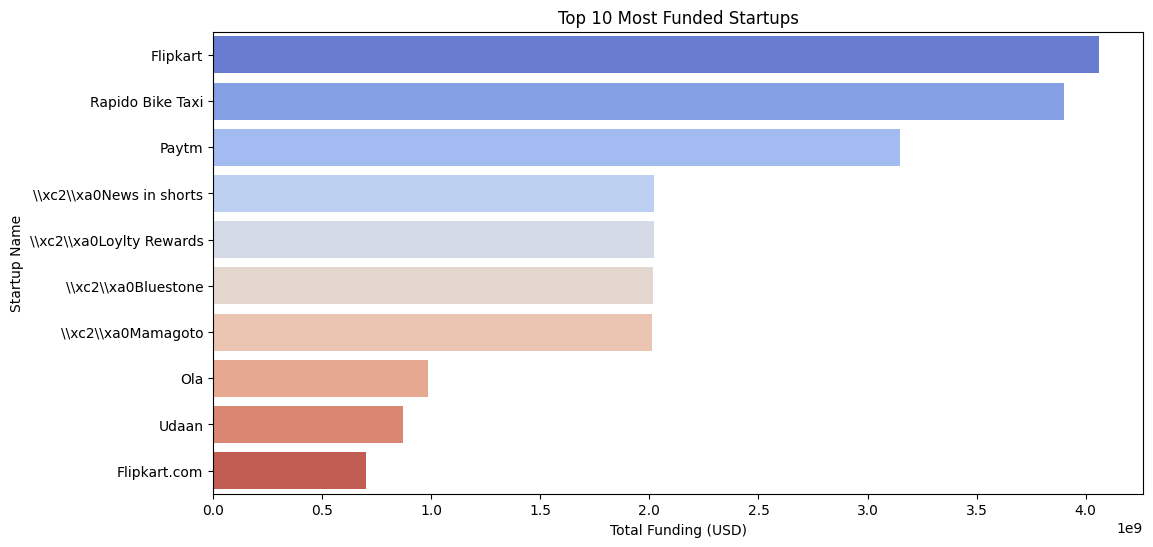

In [122]:

plt.figure(figsize=(12,6))
sns.barplot(x=top_funded_startups.values, y=top_funded_startups.index, palette="coolwarm")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Startup Name")
plt.title("Top 10 Most Funded Startups")
plt.show()
#	1e9 → 1 billion

### Most Popular Industries by Funding

/var/folders/m2/8_jd9vkj7g7_cy51bwwn9jxh0000gn/T/ipykernel_40672/1873799353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette="magma")


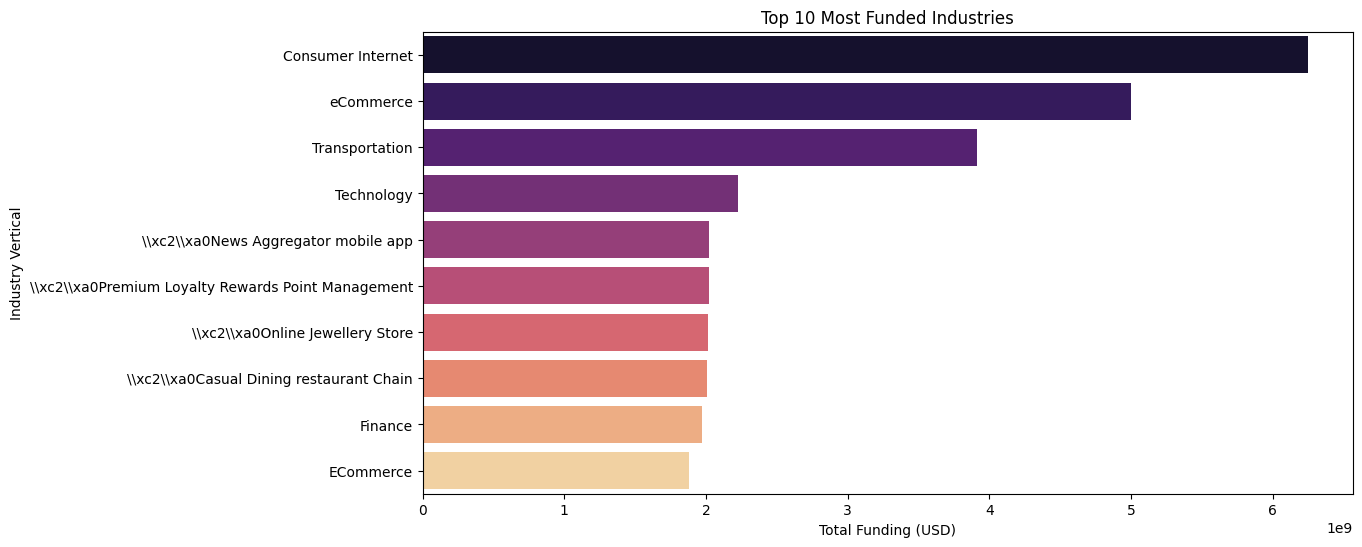

In [123]:
top_industries = df_clean.groupby("Industry Vertical")["Amount in USD"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="magma")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Industry Vertical")
plt.title("Top 10 Most Funded Industries")
plt.show()

### Cities Attracting the Most Funding

/var/folders/m2/8_jd9vkj7g7_cy51bwwn9jxh0000gn/T/ipykernel_40672/709943458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


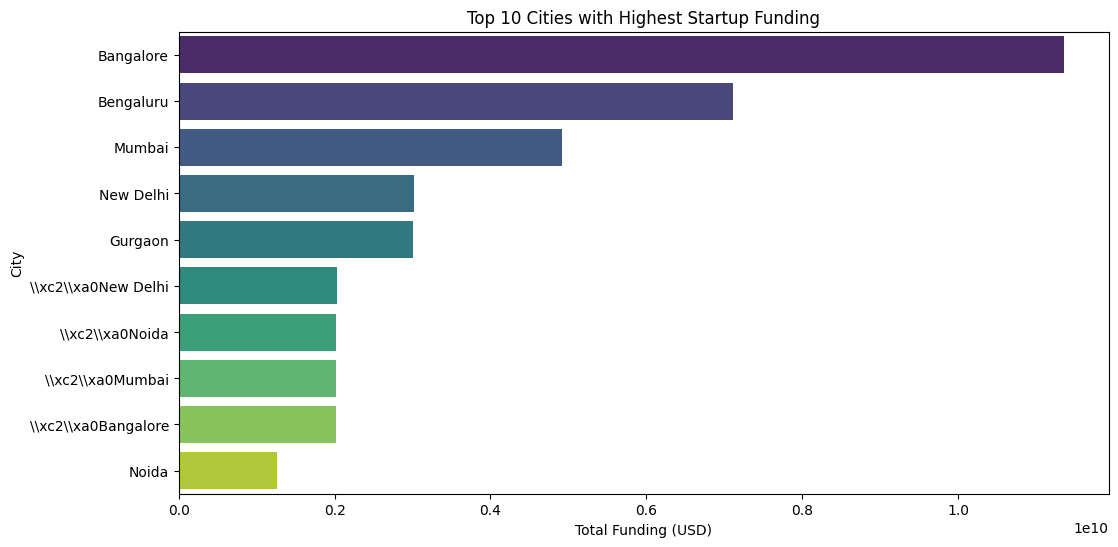

In [124]:
top_cities = df_clean.groupby("City")["Amount in USD"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.xlabel("Total Funding (USD)")
plt.ylabel("City")
plt.title("Top 10 Cities with Highest Startup Funding")
plt.show()

## 2: Multivariate Analysis (Finding Relationships)

###  Funding Trends Over Time

/var/folders/m2/8_jd9vkj7g7_cy51bwwn9jxh0000gn/T/ipykernel_40672/3621825602.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_clean.set_index("Date")["Amount in USD"].resample("M").sum().plot(figsize=(12,6), color="red")


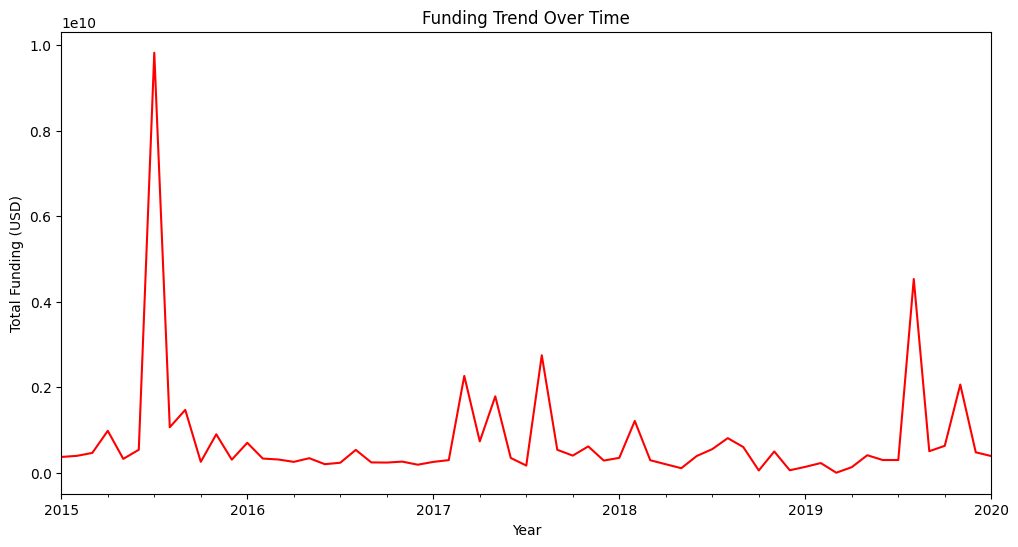

In [125]:
df_clean.set_index("Date")["Amount in USD"].resample("M").sum().plot(figsize=(12,6), color="red")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.title("Funding Trend Over Time")
plt.show()

### Investment Type vs. Funding Amount

/var/folders/m2/8_jd9vkj7g7_cy51bwwn9jxh0000gn/T/ipykernel_40672/424254778.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="InvestmentnType", y="Amount in USD", palette="pastel")


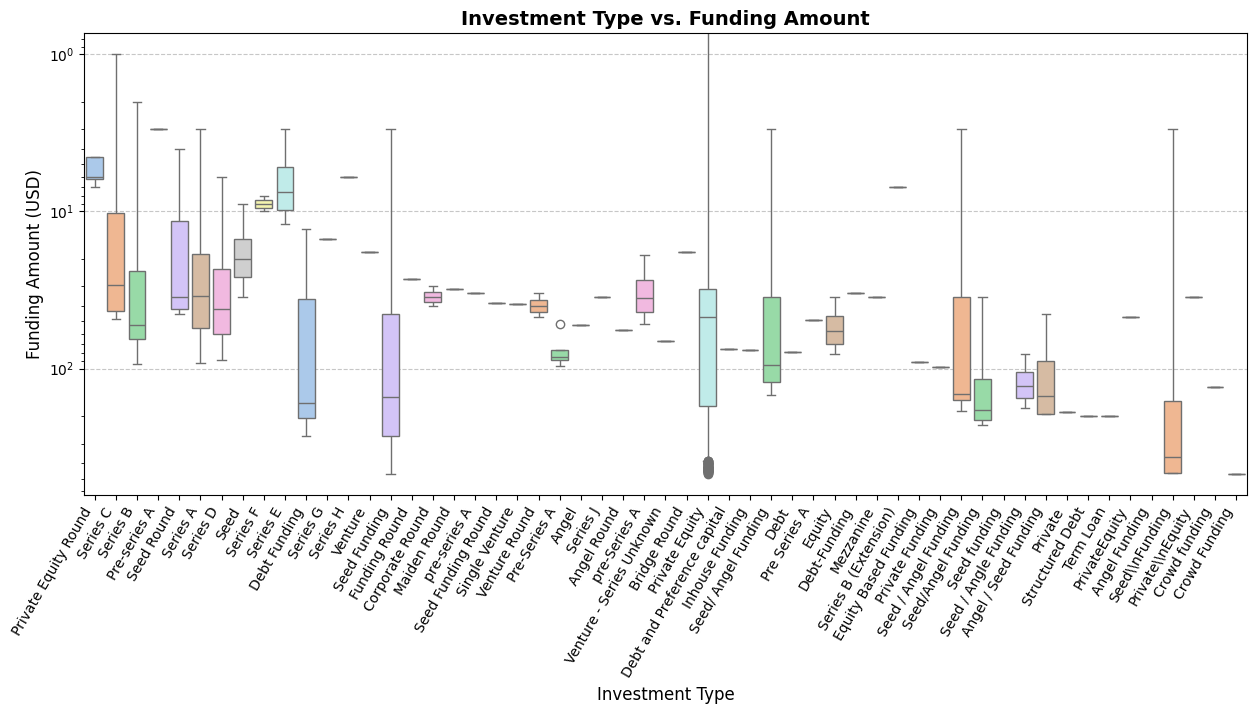

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing column names by stripping spaces
df.columns = df.columns.str.strip()

# Adjust figure size for better visibility
plt.figure(figsize=(15, 6))  

# Create the boxplot with corrected column names
sns.boxplot(data=df, x="InvestmentnType", y="Amount in USD", palette="pastel")

plt.xticks(rotation=60, ha="right")  
plt.yscale("log")  # Log scale to handle large funding values
plt.xlabel("Investment Type", fontsize=12)
plt.ylabel("Funding Amount (USD)", fontsize=12)
plt.title("Investment Type vs. Funding Amount", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.show()

/var/folders/m2/8_jd9vkj7g7_cy51bwwn9jxh0000gn/T/ipykernel_40672/139600230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=investment_funding["Investment Type"], x=investment_funding["Amount in USD"], palette="coolwarm")


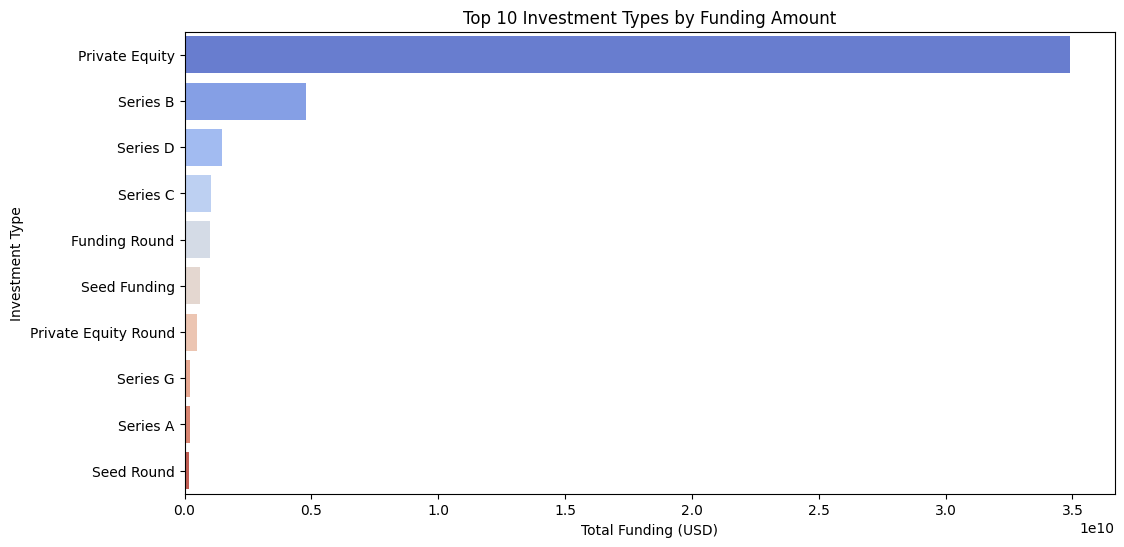

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate funding by Investment Type
investment_funding = df_clean.groupby("Investment Type")["Amount in USD"].sum().reset_index()

# Sort in descending order
investment_funding = investment_funding.sort_values(by="Amount in USD", ascending=False).head(10)  # Top 10

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y=investment_funding["Investment Type"], x=investment_funding["Amount in USD"], palette="coolwarm")

# Labels and title
plt.xlabel("Total Funding (USD)")
plt.ylabel("Investment Type")
plt.title("Top 10 Investment Types by Funding Amount")
plt.show()

### Investment Type vs. Startup Count

/var/folders/m2/8_jd9vkj7g7_cy51bwwn9jxh0000gn/T/ipykernel_40672/2578672025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=investment_count.index, x=investment_count.values, palette="magma")


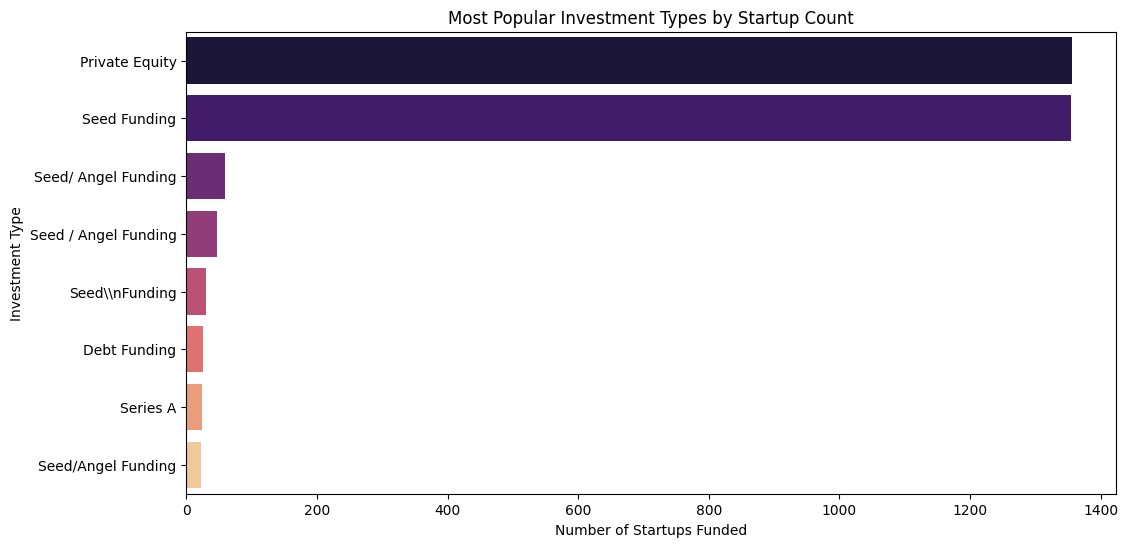

In [138]:
investment_count = df_clean["Investment Type"].value_counts().head(8)

plt.figure(figsize=(12, 6))
sns.barplot(y=investment_count.index, x=investment_count.values, palette="magma")

plt.xlabel("Number of Startups Funded")
plt.ylabel("Investment Type")
plt.title("Most Popular Investment Types by Startup Count")
plt.show()

In [127]:
df_clean.to_csv("cleaned_startup_funding.csv", index=False)